<a href="https://colab.research.google.com/github/dtype2100/TIL/blob/master/stock_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install finance-datareader

In [ ]:
!apt -qq install fonts-nanum*

fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# matplotlib rebuild
import matplotlib as mpl
#mpl.font_manager._rebuild()

In [ ]:
# matplotlib 환경 설정
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np

In [ ]:
kospi_df = fdr.DataReader('KS11') # 코스피
kosdaq_df = fdr.DataReader('KQ11') # 코스닥
dj_df = fdr.DataReader('DJI') # 다우존스
nas_df = fdr.DataReader('IXIC') # 나스닥
sp_df = fdr.DataReader('US500') # S&P500

In [ ]:
san_df = fdr.DataReader('SSE') # 상해
# sim_df = fdr.DataReader('SZSE') # 심천
# hon_df = fdr.DataReader('HKEX') # 홍콩
to_df = fdr.DataReader('TSE') # 도쿄

In [ ]:
btc = fdr.DataReader('BTC/KRW', '2016-01-01')

In [ ]:
# FX 환율, 1995 ~ 현재
usdkrw = fdr.DataReader('USD/KRW', '1995-01-01') # 달러 원화
usdeur = fdr.DataReader('USD/EUR', '1995-01-01') # 달러 유로화
usdcny = fdr.DataReader('USD/CNY', '1995-01-01') # 달러 위엔화

In [ ]:
# 채권 수익률
df = fdr.DataReader('KR1YT=RR') # 1년만기 한국국채 수익률
df = fdr.DataReader('KR10YT=RR') # 10년만기 한국국채 수익률

df = fdr.DataReader('US1MT=X') # 1개월 만기 미국국채 수익률
df = fdr.DataReader('US10YT=X') # 10년 만기 미국국채 수익률

In [ ]:
# KRX stock symbol list
stocks = fdr.StockListing('KRX') # 코스피, 코스닥, 코넥스 전체

# S&P 500 symbol list
sp500 = fdr.StockListing('S&P500')

/usr/local/lib/python3.7/dist-packages/FinanceDataReader/wikipedia/listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


In [ ]:
# 기타 주요 거래소 상장종목 리스트
san_stocks = fdr.StockListing('SSE') # 상해 거래소
sim_stocks = fdr.StockListing('SZSE') # 신천 거래소
hon_stocks = fdr.StockListing('HKEX') # 홍콩거래소
to_stocks = fdr.StockListing('TSE') # 도쿄 증권거래소
hos_stocks = fdr.StockListing('HOSE') # 호치민 증권거래소

100%|██████████| 410/410 [00:02<00:00, 173.92it/s]


In [ ]:
# 캔들차트 그리기
df = fdr.DataReader('005930', '2021-01-01', '2021-02-15')

fdr.chart.plot(df)
fdr.chart.plot(df, title='삼성전자(005930)')

# 차트 설정
config = {'title':'fdr.chart.config()를 사용하여 설정을 한번에 지정할 수 있습니다', 
          'width': 600, 
          'height': 300,
          'volume': True,
}

fdr.chart.config(config=config)
fdr.chart.plot(df)

In [ ]:
stock_list  = (['네이버', '035420'],
               ['카카오', '035720'])

In [ ]:
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]
len(df_list )

2

In [ ]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)

,네이버,카카오
Date,,
2017-01-02,155620,15394
2017-01-03,153617,16057
2017-01-04,162230,16920
2017-01-05,158424,16860
2017-01-06,160026,16800
2017-01-09,156021,16619
2017-01-10,158625,16458
2017-01-11,159426,16699
2017-01-12,160627,16438


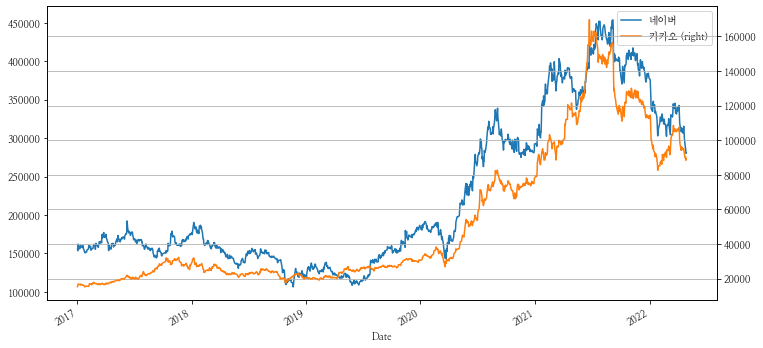

In [ ]:
df[['네이버', '카카오']].plot(secondary_y=['카카오'])

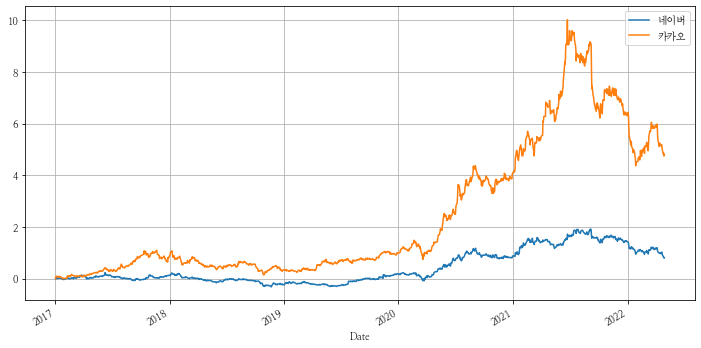

In [ ]:
df2 = df[['네이버', '카카오']]
df_plot = df2 / df2.iloc[0] - 1.0 # 수익률
df_plot.plot()

In [ ]:
df_plot.iloc[-1].sort_values(ascending=False) # 수익률

카카오    4.800961
네이버    0.802468
Name: 2022-04-28 00:00:00, dtype: float64

In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['카카오', '035720'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스피,카카오
Date,,
2017-01-02,2026.16,15394
2017-01-03,2043.97,16057
2017-01-04,2045.64,16920
2017-01-05,2041.95,16860
2017-01-06,2049.12,16800


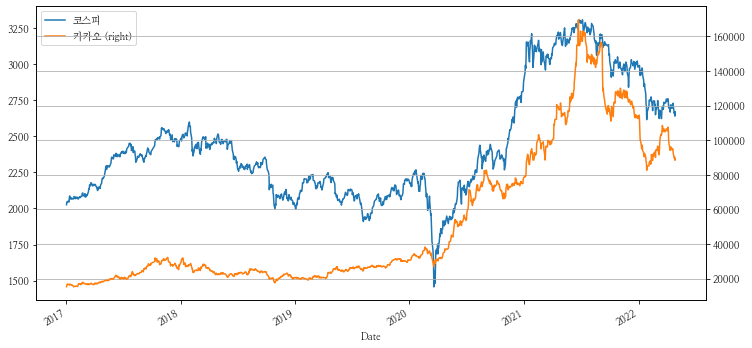

In [ ]:
df[['코스피', '카카오']].plot(secondary_y=['카카오'])

In [ ]:
stock_list  = (['코스닥', 'KQ11'],
               ['카카오', '035720'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스닥,카카오
Date,,
2017-01-02,632.04,15394
2017-01-03,636.57,16057
2017-01-04,639.79,16920
2017-01-05,642.48,16860
2017-01-06,643.68,16800


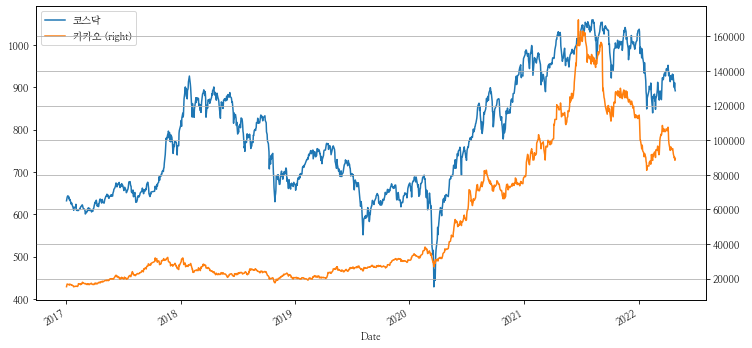

In [ ]:
df[['코스닥', '카카오']].plot(secondary_y=['카카오'])

In [ ]:
stock_list  = (['코스닥', 'KQ11'],
               ['네이버', '035420'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list ] 
df.head(5)

,코스닥,네이버
Date,,
2017-01-02,632.04,155620
2017-01-03,636.57,153617
2017-01-04,639.79,162230
2017-01-05,642.48,158424
2017-01-06,643.68,160026


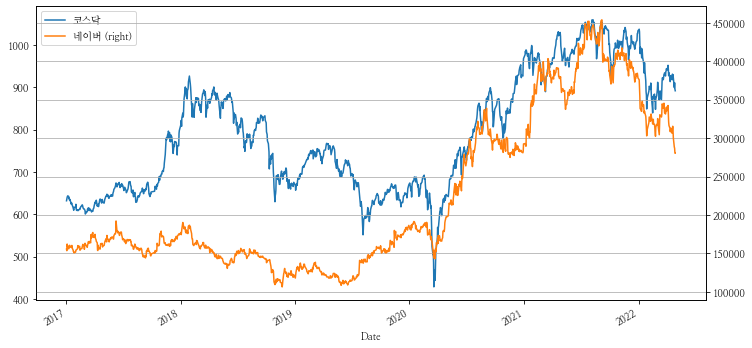

In [ ]:
df[['코스닥', '네이버']].plot(secondary_y=['네이버'])

In [ ]:
stock_list  = (['코스피', 'KS11'],
               ['네이버', '035420'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list ]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,코스피,네이버
Date,,
2017-01-02,2026.16,155620
2017-01-03,2043.97,153617
2017-01-04,2045.64,162230
2017-01-05,2041.95,158424
2017-01-06,2049.12,160026


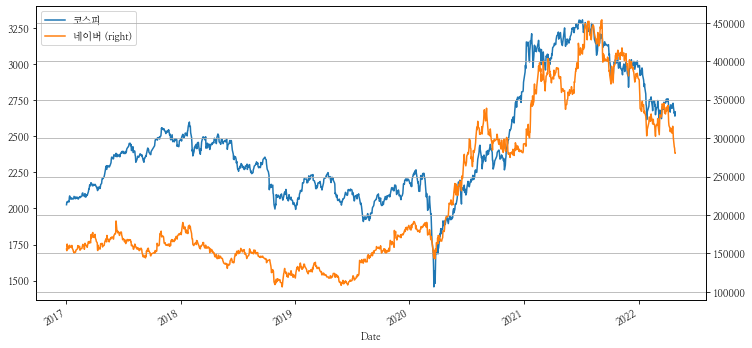

In [ ]:
df[['코스피', '네이버']].plot(secondary_y=['네이버'])

In [ ]:
stock_list = (['비트코인', 'BTC/KRW'],
               ['네이버', '035420'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,비트코인,네이버
Date,,
2017-01-02,NaN,155620.0
2017-01-03,NaN,153617.0
2017-01-04,NaN,162230.0
2017-01-05,NaN,158424.0
2017-01-06,NaN,160026.0


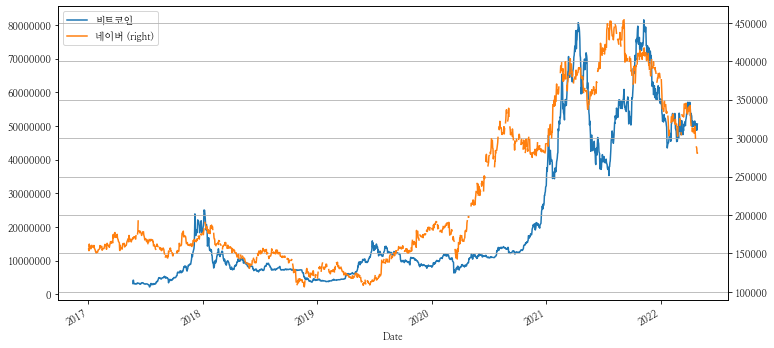

In [ ]:
df[['비트코인', '네이버']].plot(secondary_y=['네이버'])

In [ ]:
stock_list = (['비트코인', 'BTC/KRW'],
               ['코스피', 'KS11'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,비트코인,코스피
Date,,
2017-01-02,NaN,2026.16
2017-01-03,NaN,2043.97
2017-01-04,NaN,2045.64
2017-01-05,NaN,2041.95
2017-01-06,NaN,2049.12


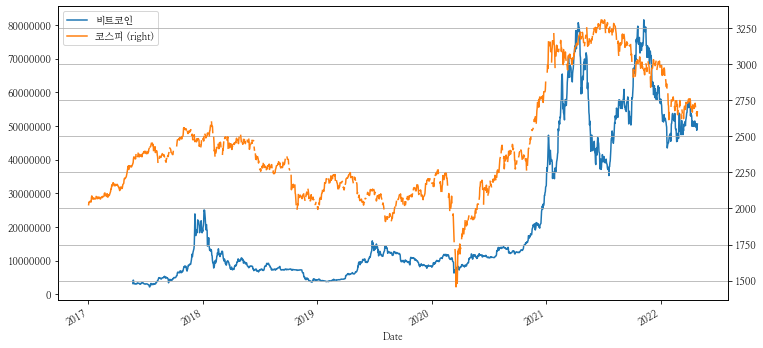

In [ ]:
df[['비트코인', '코스피']].plot(secondary_y=['코스피'])

In [ ]:
stock_list = (['비트코인', 'BTC/KRW'],
               ['코스닥', 'KQ11'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,비트코인,코스닥
Date,,
2017-01-02,NaN,632.04
2017-01-03,NaN,636.57
2017-01-04,NaN,639.79
2017-01-05,NaN,642.48
2017-01-06,NaN,643.68


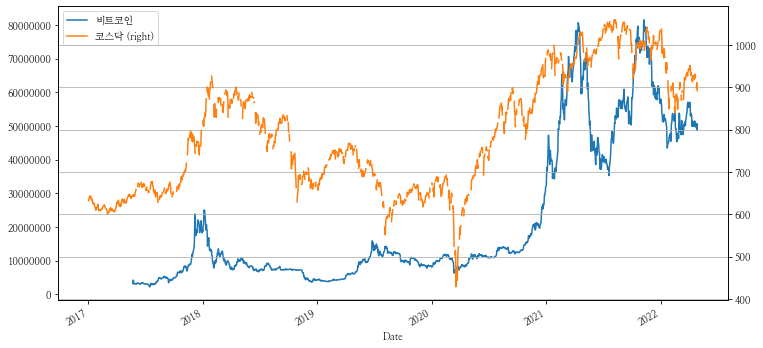

In [ ]:
df[['비트코인', '코스닥']].plot(secondary_y=['코스닥'])

In [ ]:
stock_list = (['S&P500', 'US500'],
               ['코스닥', 'KQ11'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,S&P500,코스닥
Date,,
2017-01-02,NaN,632.04
2017-01-03,2257.83,636.57
2017-01-04,2270.75,639.79
2017-01-05,2269.00,642.48
2017-01-06,2276.98,643.68


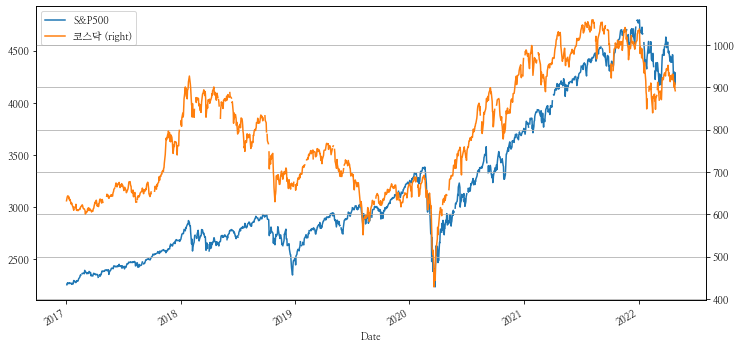

In [ ]:
df[['S&P500', '코스닥']].plot(secondary_y=['코스닥'])

In [ ]:
stock_list = (['S&P500', 'US500'],
               ['코스피', 'KS11'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,S&P500,코스피
Date,,
2017-01-02,NaN,2026.16
2017-01-03,2257.83,2043.97
2017-01-04,2270.75,2045.64
2017-01-05,2269.00,2041.95
2017-01-06,2276.98,2049.12


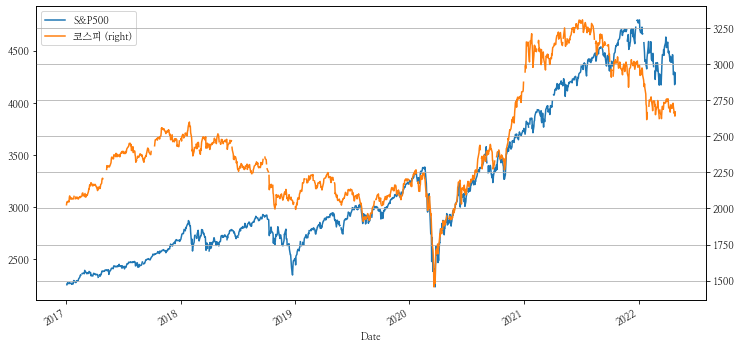

In [ ]:
df[['S&P500', '코스피']].plot(secondary_y=['코스피'])

In [ ]:
stock_list = (['달러/원화', 'USD/KRW'],
               ['코스피', 'KS11'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,달러/원화,코스피
Date,,
2017-01-02,1203.93,2026.16
2017-01-03,1206.82,2043.97
2017-01-04,1196.15,2045.64
2017-01-05,1182.19,2041.95
2017-01-06,1202.00,2049.12


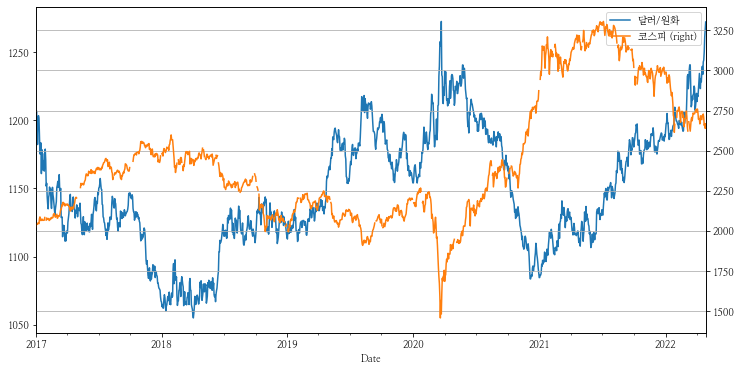

In [ ]:
df[['달러/원화', '코스피']].plot(secondary_y=['코스피'])

In [ ]:
stock_list = (['달러/원화', 'USD/KRW'],
               ['코스닥', 'KQ11'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,달러/원화,코스닥
Date,,
2017-01-02,1203.93,632.04
2017-01-03,1206.82,636.57
2017-01-04,1196.15,639.79
2017-01-05,1182.19,642.48
2017-01-06,1202.00,643.68


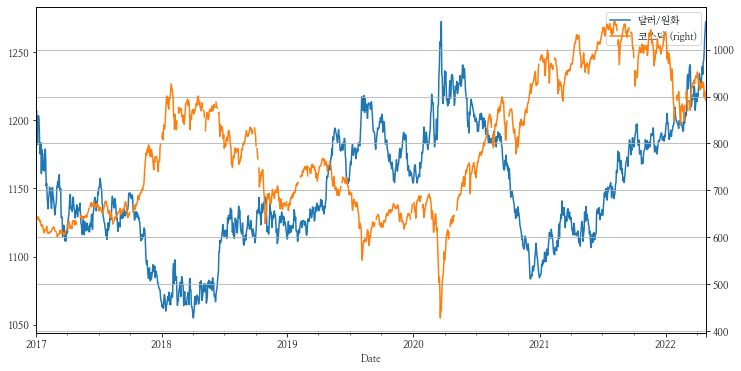

In [ ]:
df[['달러/원화', '코스닥']].plot(secondary_y=['코스닥'])

In [ ]:
usdkrw = fdr.DataReader('USD/KRW', '1995-01-01') # 달러 원화

In [ ]:
usdkrw.head()

,Close,Open,High,Low,Change
Date,,,,,
1995-01-02,788.50,788.50,788.50,788.50,0.0000
1995-01-03,788.65,788.05,788.85,787.55,0.0002
1995-01-04,789.95,788.65,790.05,788.45,0.0016
1995-01-05,789.90,789.80,790.20,789.30,-0.0001
1995-01-06,791.55,789.75,791.65,789.65,0.0021


In [ ]:
stock_list = (['달러/원화', 'USD/KRW'],
               ['S&P500', 'US500'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,달러/원화,S&P500
Date,,
2017-01-02,1203.93,NaN
2017-01-03,1206.82,2257.83
2017-01-04,1196.15,2270.75
2017-01-05,1182.19,2269.00
2017-01-06,1202.00,2276.98


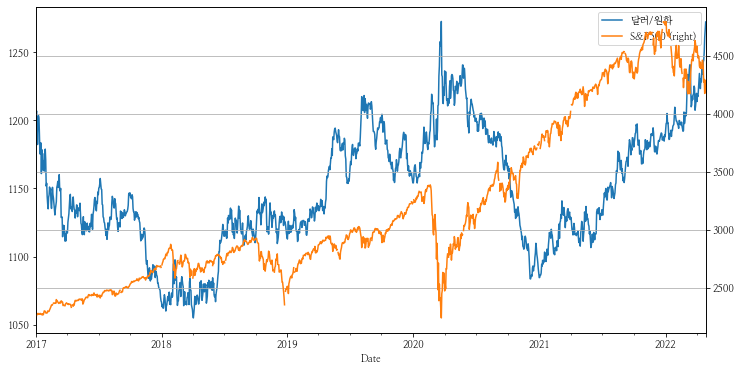

In [ ]:
df[['달러/원화', 'S&P500']].plot(secondary_y=['S&P500'])

In [ ]:
stock_list = (['달러/원화', 'USD/KRW'],
               ['네이버', '035420'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,달러/원화,네이버
Date,,
2017-01-02,1203.93,155620.0
2017-01-03,1206.82,153617.0
2017-01-04,1196.15,162230.0
2017-01-05,1182.19,158424.0
2017-01-06,1202.00,160026.0


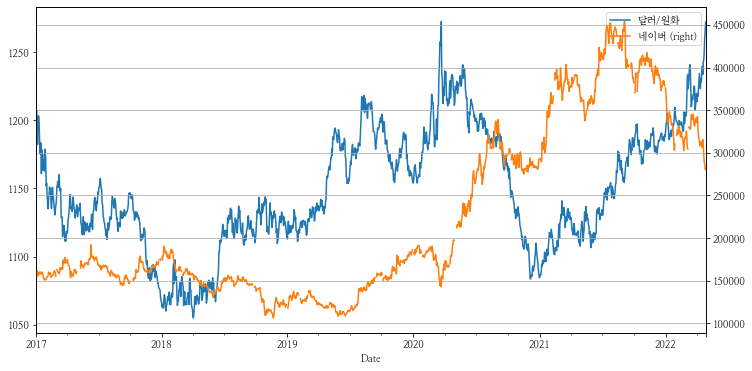

In [ ]:
df[['달러/원화', '네이버']].plot(secondary_y=['네이버']) # 035720

In [ ]:
stock_list = (['달러/원화', 'USD/KRW'],
               ['카카오', '035720'])
df_list  = [fdr.DataReader(code, '2017-01-01', '2022-04-28')['Close'] for name, code in stock_list]

# pd.concat()로 합치기
df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(5)

,달러/원화,카카오
Date,,
2017-01-02,1203.93,15394.0
2017-01-03,1206.82,16057.0
2017-01-04,1196.15,16920.0
2017-01-05,1182.19,16860.0
2017-01-06,1202.00,16800.0


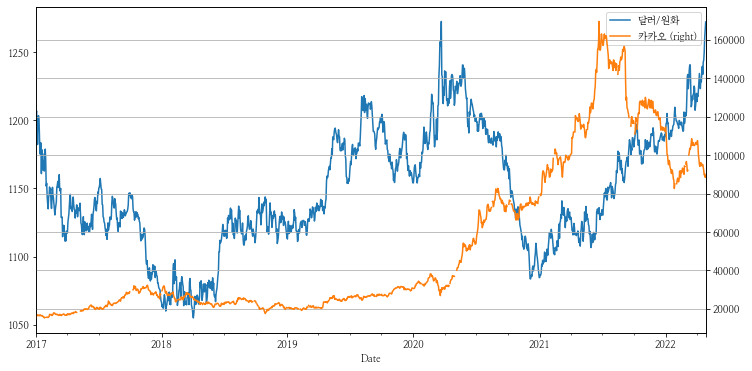

In [ ]:
df[['달러/원화', '카카오']].plot(secondary_y=['카카오']) 